In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import bisect
import scipy.optimize as sc
from scipy.interpolate import CubicSpline

# Punto Fijo

In [2]:
def punto_fijo(g,p0,epsilon,Nmax):
    iter=0

    while iter<Nmax:
        p1=g(p0)
        if abs(p1-p0)<epsilon:
            return p1
        p0=p1
        iter+=1
    return None

In [3]:
#ejemplo de uso:
g=lambda x: x-(x-1)**2
p0=1.0
epsilon=1E-5
Nmax=1000
raiz_cajanegra=punto_fijo(g,p0,epsilon,Nmax)
raiz_scipypf=sc.fixed_point(g,x0=p0,xtol=epsilon,maxiter=Nmax)

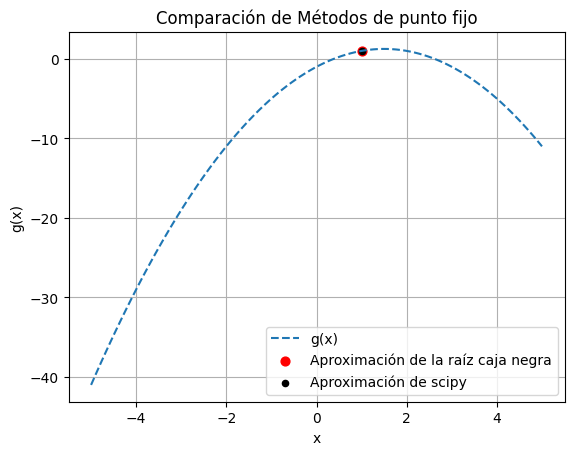

In [4]:
x_=np.linspace(-5,5,100)
y_=g(x_)
plt.plot(x_,y_,"--",label="g(x)")
plt.scatter(raiz_cajanegra,g(raiz_cajanegra),s=40,color="r",label="Aproximación de la raíz caja negra")
plt.scatter(raiz_scipypf,g(raiz_scipypf),color="k",s=20,label="Aproximación de scipy")
plt.title("Comparación de Métodos de punto fijo")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.show()

# Método de bisección

In [5]:
f=lambda x: x*np.exp(x)-1
x=np.linspace(0, 1, 100)

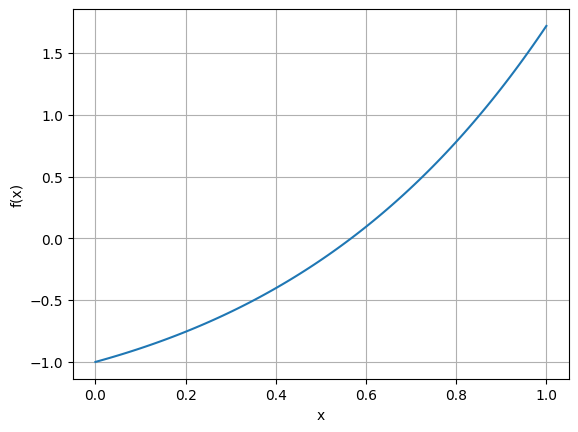

In [6]:
plt.figure()
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()

In [7]:
x=np.arange(0.5, 0.6, 0.01)
f(x)

array([-0.17563936, -0.15070149, -0.12534562, -0.09956588, -0.07335629,
       -0.04671084, -0.0196234 ,  0.00791222,  0.03590229,  0.06435317])

In [8]:
a = -1
b = 20
c=a
epsilon=1E-5
iter=0
NmaxIter = 1000
while( (abs(f(c))>=epsilon) & (f(a)*f(b)<0) & (iter<NmaxIter)):
  c=(a+b)*0.5
  #print("hola")
  if(f(c)>0):
    b=c
  else:
    a=c
  iter=iter+1
  if(iter==NmaxIter):
    print(f"No se alcanza la presición deseada, número  \
          máximo de iteraciones superado Nmax={NmaxIter}")



In [9]:
#Actividad
def biseccion(a, b, f, tolerencia=1E-5,NmaxIter=1000):
    c=a
    iter=0
    while( (abs(f(c))>=epsilon) & (f(a)*f(b)<0) & (iter<NmaxIter)):
        c=(a+b)*0.5

        if(f(c)>0):
            b=c
        else:
            a=c
        iter=iter+1

        if(iter==NmaxIter):
            print(f"No se alcanza la presición deseada, número máximo de iteraciones superado Nmax={NmaxIter}")

    return c

In [10]:
#Ejemplo para ver si funciona
f=lambda x:x**2-4
a,b=.2,2
raiz=biseccion(a,b,f)
raiz

0.2

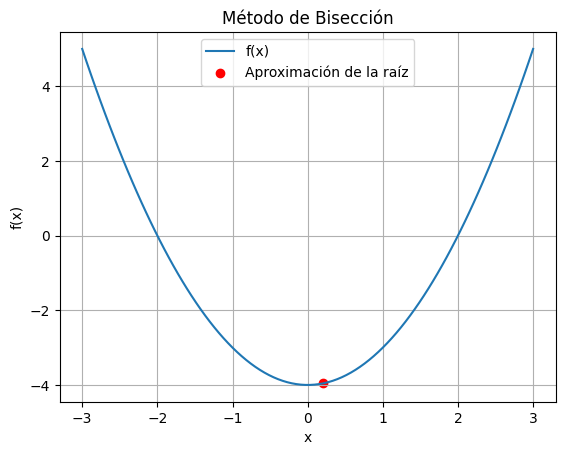

In [11]:
x=np.linspace(-3,3,100)
y=f(x)
plt.plot(x,y,label="f(x)")
plt.scatter(raiz,f(raiz),color="r",label="Aproximación de la raíz")
plt.title("Método de Bisección")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Relacionado al ejercicio proporcionado
f1=lambda x: x*np.exp(x)-1
x1=np.linspace(0, 1, 100)
a1,b1=-1,20
raiz1=biseccion(a1,b1,f1)

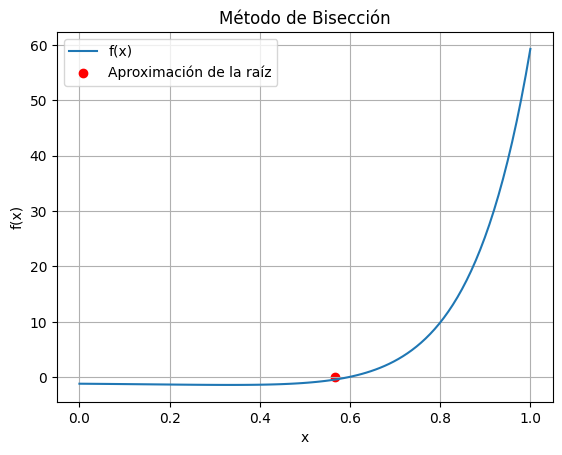

In [13]:
y1=f1(x)
plt.plot(x1,y1,label="f(x)")
plt.scatter(raiz1,f1(raiz1),color="r",label="Aproximación de la raíz")
plt.title("Método de Bisección")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

### Comparación con scipy

In [14]:
f2=lambda x: x*np.exp(x)-1
raiz_caja_negra=biseccion(a1,b1,f1)
raiz_scipy=bisect(f2,a,b)
x2=np.linspace(0, 1, 100)
y2=f2(x)

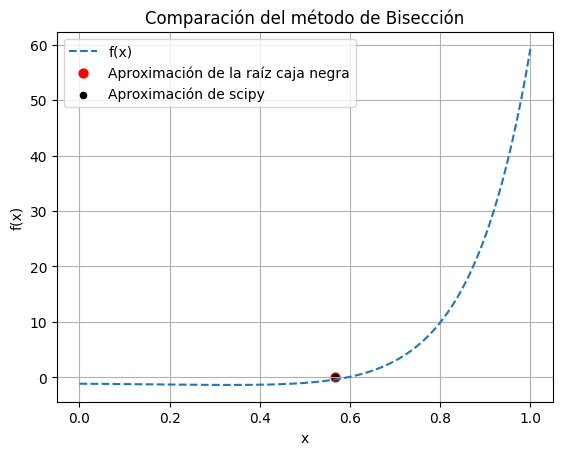

In [15]:
y1=f1(x)
plt.plot(x2,y2,"--",label="f(x)")
plt.scatter(raiz_caja_negra,f2(raiz_caja_negra),s=40,color="r",label="Aproximación de la raíz caja negra")
plt.scatter(raiz_scipy,f2(raiz_scipy),color="k",s=20,label="Aproximación de scipy")
plt.title("Comparación del método de Bisección")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()